<a href="https://colab.research.google.com/github/DATA601-CustSegment-Nov2025-to-Feb2026/New-CustSegment-Project/blob/main/Customer_Segmentation_(Preprocessing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries & Load Datasets

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Paths to the final merged dataset stored in Google Drive
final_merged_path = '/content/drive/MyDrive/0. Colab Notebooks (DATA 60X Project)/2. Preprocessed Datasets/customer_segmentation_after_merging.csv'

# Read the dataset from its CSV file
final_merged_df = pd.read_csv(final_merged_path, low_memory=False)

# Overview of the Dataset

In [4]:
# Show all columns
pd.set_option('display.max_columns', None)

# Display first 5 rows of the dataset
final_merged_df.head(5)

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc,description,campaign,start_day,end_day,received_campaign,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product,display,mailer,coupon_upc
0,979,40765361731,606,5978656,0,0.00,364,0.0,1621,87,-21.49,0.0,TypeA,18.0,587.0,642.0,yes,35-44,B,35-49K,Homeowner,1 Adult Kids,2,1,1,,National,,,,NaN,NaN,NaN
1,1463,30822740847,256,864900,1,19.99,372,0.0,2006,37,-19.99,0.0,TypeA,26.0,224.0,264.0,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764,GROCERY,National,HOUSEHOLD CLEANG NEEDS,TOOLS - FLOOR & FURNITURE,1 KIT,NaN,NaN,NaN
2,1463,27609884211,53,5978656,0,0.00,372,0.0,1908,8,-16.99,0.0,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,,National,,,,NaN,NaN,NaN
3,1228,31883657167,328,900379,2,24.38,406,-1.6,1438,48,-16.98,0.0,TypeA,30.0,323.0,369.0,yes,45-54,U,100-124K,Unknown,Single Female,1,None/Unknown,69,SEAFOOD-PCKGD,Private,SEAFOOD - FROZEN,SEAFOOD-FRZ-IQF RAW SHRIMP RW,16 OZ,0,A,NaN
4,17,28179613679,100,997415,4,103.32,361,0.0,1741,15,-16.00,0.0,NaN,NaN,NaN,NaN,no,65+,B,Under 15K,Homeowner,2 Adults No Kids,2,None/Unknown,539,DRUG GM,National,CIGARETTES,CIGARETTES,500843 CTN,NaN,NaN,NaN


In [5]:
# Calculate the number of rows and columns in 'final_merged_df'
num_rows_final_merged_df,num_cols_final_merged_df = final_merged_df.shape

print("Number of rows in final_merged_df:", num_rows_final_merged_df)
print("Number of columns in final_merged_df:", num_cols_final_merged_df)

Number of rows in final_merged_df: 2595732
Number of columns in final_merged_df: 33


In [6]:
# Display the data type of each column in the 'final_merged_df'
print(final_merged_df.dtypes)

household_key             int64
basket_id                 int64
day                       int64
product_id                int64
quantity                  int64
sales_value             float64
store_id                  int64
retail_disc             float64
trans_time                int64
week_no                   int64
coupon_disc             float64
coupon_match_disc       float64
description              object
campaign                float64
start_day               float64
end_day                 float64
received_campaign        object
age_desc                 object
marital_status_code      object
income_desc              object
homeowner_desc           object
hh_comp_desc             object
household_size_desc      object
kid_category_desc        object
manufacturer              int64
department               object
brand                    object
commodity_desc           object
sub_commodity_desc       object
curr_size_of_product     object
display                  object
mailer  

In [7]:
# Show the number of duplicate rows
num_duplicates_final_merged_df = final_merged_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates_final_merged_df}")

Number of duplicate rows: 0


In [8]:
# Count missing values in each column of the 'final_merged_df'
missing_counts_final_merged_df = final_merged_df.isna().sum()
print(missing_counts_final_merged_df)

household_key                 0
basket_id                     0
day                           0
product_id                    0
quantity                      0
sales_value                   0
store_id                      0
retail_disc                   0
trans_time                    0
week_no                       0
coupon_disc                   0
coupon_match_disc             0
description             1828306
campaign                1828306
start_day               1828306
end_day                 1828306
received_campaign             0
age_desc                1168429
marital_status_code     1168429
income_desc             1168429
homeowner_desc          1168429
hh_comp_desc            1168429
household_size_desc     1168429
kid_category_desc       1168429
manufacturer                  0
department                    0
brand                         0
commodity_desc                0
sub_commodity_desc            0
curr_size_of_product          0
display                 2031958
mailer  

In [9]:
# Count number of 'yes' and 'no' in 'received_campaign'
received_campaign_counts = final_merged_df['received_campaign'].value_counts()
print(received_campaign_counts)

received_campaign
no     1828306
yes     767426
Name: count, dtype: int64


# Create Variables, Drop Non-Important Variables and Handle Missing Values

## Create Time-Of-Day and Cyclical Encoding Variables

In [10]:
# Convert 'trans_time' column to string and pad with zeros to ensure 4 digits
final_merged_df['trans_time'] = final_merged_df['trans_time'].astype(str).str.zfill(4)

# Convert 'trans_time' column in HHMM format
final_merged_df['trans_time_dt'] = pd.to_datetime(final_merged_df['trans_time'], format='%H%M')

# Convert 'trans_time_dt' to total minutes for cyclical encoding
final_merged_df['minutes'] = (
    final_merged_df['trans_time_dt'].dt.hour * 60 +
    final_merged_df['trans_time_dt'].dt.minute
)

# Cyclical encoding
final_merged_df['trans_time_sin'] = np.sin(2 * np.pi * final_merged_df['minutes'] / 1440)
final_merged_df['trans_time_cos'] = np.cos(2 * np.pi * final_merged_df['minutes'] / 1440)

# Convert to time only
final_merged_df['trans_time_dt'] = final_merged_df['trans_time_dt'].dt.time

In [11]:
# Count abnormal values for sine and cosine transformation of transaction time.
abnormal_trans_time_sin = ((final_merged_df['trans_time_sin'] < -1) | (final_merged_df['trans_time_sin'] > 1)).sum()
abnormal_trans_time_cos = ((final_merged_df['trans_time_cos'] < -1) | (final_merged_df['trans_time_cos'] > 1)).sum()

# Print the results
print(f"Number of abnormal values in trans_time_sin: {abnormal_trans_time_sin}")
print(f"Number of abnormal values in trans_time_cos: {abnormal_trans_time_cos}")

Number of abnormal values in trans_time_sin: 0
Number of abnormal values in trans_time_cos: 0


In [12]:
# Create a function to categorize time-of-day category based on hour
def categorize_time_of_day(dt):
    hour = dt.hour
    if 0 <= hour < 6:
        return 'Midnight'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:  # 21 <= hour <= 23
        return 'Night'

# Apply function to create new column: 'trans_time_dt'
final_merged_df['trans_time_day'] = final_merged_df['trans_time_dt'].apply(categorize_time_of_day)

In [13]:
# Calculate the number of rows and columns in 'final_merged_df'
num_rows_final_merged_df,num_cols_final_merged_df = final_merged_df.shape

print("Number of rows in final_merged_df:", num_rows_final_merged_df)
print("Number of columns in final_merged_df:", num_cols_final_merged_df)

Number of rows in final_merged_df: 2595732
Number of columns in final_merged_df: 38


In [14]:
# Display first 5 rows of the dataset after adding new variables:
# trans_time_dt, minutes, trans_time_sin, trans_time_cos and trans_time_day
final_merged_df.head(5)

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc,description,campaign,start_day,end_day,received_campaign,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product,display,mailer,coupon_upc,trans_time_dt,minutes,trans_time_sin,trans_time_cos,trans_time_day
0,979,40765361731,606,5978656,0,0.00,364,0.0,1621,87,-21.49,0.0,TypeA,18.0,587.0,642.0,yes,35-44,B,35-49K,Homeowner,1 Adult Kids,2,1,1,,National,,,,NaN,NaN,NaN,16:21:00,981,-0.908143,-0.418660,Afternoon
1,1463,30822740847,256,864900,1,19.99,372,0.0,2006,37,-19.99,0.0,TypeA,26.0,224.0,264.0,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764,GROCERY,National,HOUSEHOLD CLEANG NEEDS,TOOLS - FLOOR & FURNITURE,1 KIT,NaN,NaN,NaN,20:06:00,1206,-0.852640,0.522499,Evening
2,1463,27609884211,53,5978656,0,0.00,372,0.0,1908,8,-16.99,0.0,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,,National,,,,NaN,NaN,NaN,19:08:00,1148,-0.956305,0.292372,Evening
3,1228,31883657167,328,900379,2,24.38,406,-1.6,1438,48,-16.98,0.0,TypeA,30.0,323.0,369.0,yes,45-54,U,100-124K,Unknown,Single Female,1,None/Unknown,69,SEAFOOD-PCKGD,Private,SEAFOOD - FROZEN,SEAFOOD-FRZ-IQF RAW SHRIMP RW,16 OZ,0,A,NaN,14:38:00,878,-0.636078,-0.771625,Afternoon
4,17,28179613679,100,997415,4,103.32,361,0.0,1741,15,-16.00,0.0,NaN,NaN,NaN,NaN,no,65+,B,Under 15K,Homeowner,2 Adults No Kids,2,None/Unknown,539,DRUG GM,National,CIGARETTES,CIGARETTES,500843 CTN,NaN,NaN,NaN,17:41:00,1061,-0.996566,-0.082808,Evening


## Drop Non-Important Time-Related Variables

In [15]:
# Drop non-important variables related to time
final_merged_df = final_merged_df.drop(columns=['trans_time', 'minutes'])

In [16]:
# Display first 5 rows of the dataset after dropping variables:
# trans_time and minutes
final_merged_df.head(5)

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,week_no,coupon_disc,coupon_match_disc,description,campaign,start_day,end_day,received_campaign,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product,display,mailer,coupon_upc,trans_time_dt,trans_time_sin,trans_time_cos,trans_time_day
0,979,40765361731,606,5978656,0,0.00,364,0.0,87,-21.49,0.0,TypeA,18.0,587.0,642.0,yes,35-44,B,35-49K,Homeowner,1 Adult Kids,2,1,1,,National,,,,NaN,NaN,NaN,16:21:00,-0.908143,-0.418660,Afternoon
1,1463,30822740847,256,864900,1,19.99,372,0.0,37,-19.99,0.0,TypeA,26.0,224.0,264.0,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764,GROCERY,National,HOUSEHOLD CLEANG NEEDS,TOOLS - FLOOR & FURNITURE,1 KIT,NaN,NaN,NaN,20:06:00,-0.852640,0.522499,Evening
2,1463,27609884211,53,5978656,0,0.00,372,0.0,8,-16.99,0.0,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,,National,,,,NaN,NaN,NaN,19:08:00,-0.956305,0.292372,Evening
3,1228,31883657167,328,900379,2,24.38,406,-1.6,48,-16.98,0.0,TypeA,30.0,323.0,369.0,yes,45-54,U,100-124K,Unknown,Single Female,1,None/Unknown,69,SEAFOOD-PCKGD,Private,SEAFOOD - FROZEN,SEAFOOD-FRZ-IQF RAW SHRIMP RW,16 OZ,0,A,NaN,14:38:00,-0.636078,-0.771625,Afternoon
4,17,28179613679,100,997415,4,103.32,361,0.0,15,-16.00,0.0,NaN,NaN,NaN,NaN,no,65+,B,Under 15K,Homeowner,2 Adults No Kids,2,None/Unknown,539,DRUG GM,National,CIGARETTES,CIGARETTES,500843 CTN,NaN,NaN,NaN,17:41:00,-0.996566,-0.082808,Evening


## Create Used Retail Discount Variable

In [17]:
# Count missing values in each column of the 'final_merged_df'
missing_counts_final_merged_df = final_merged_df.isna().sum()
print(missing_counts_final_merged_df)

household_key                 0
basket_id                     0
day                           0
product_id                    0
quantity                      0
sales_value                   0
store_id                      0
retail_disc                   0
week_no                       0
coupon_disc                   0
coupon_match_disc             0
description             1828306
campaign                1828306
start_day               1828306
end_day                 1828306
received_campaign             0
age_desc                1168429
marital_status_code     1168429
income_desc             1168429
homeowner_desc          1168429
hh_comp_desc            1168429
household_size_desc     1168429
kid_category_desc       1168429
manufacturer                  0
department                    0
brand                         0
commodity_desc                0
sub_commodity_desc            0
curr_size_of_product          0
display                 2031958
mailer                  2031958
coupon_u

In [18]:
# Check the minimum and maximum values of 'retail_disc' variable
min_value_retail_disc = final_merged_df['retail_disc'].min()
max_value_retail_disc = final_merged_df['retail_disc'].max()

print("Minimum value of 'retail_disc' variable:", min_value_retail_disc)
print("Maximum value of of 'retail_disc' variable:", max_value_retail_disc)

Minimum value of 'retail_disc' variable: -180.0
Maximum value of of 'retail_disc' variable: 3.99


In [19]:
# Count transactions where 'retail_disc' variable is positive.
# Positive values in 'retail_disc' variable indicate an issue because discounts are recorded as negative values in this dataset.
num_positive_retail_disc = (final_merged_df['retail_disc'] > 0).sum()
print("Number of values greater than 0 in 'retail_disc' variable:", num_positive_retail_disc)

Number of values greater than 0 in 'retail_disc' variable: 36


In [20]:
# As there are only a very small number of positive values (36) in 'retail_disc' variable, it is likely due data entry.
# So, any value greater than 0 in 'retail_disc' variable is converted to 0.
final_merged_df.loc[final_merged_df['retail_disc'] > 0, 'retail_disc'] = 0

# Count transactions where 'retail_disc' variable is positive after converting to 0.
num_positive_retail_disc = (final_merged_df['retail_disc'] > 0).sum()
print("Number of values greater than 0 in 'retail_disc' variable:", num_positive_retail_disc)

Number of values greater than 0 in 'retail_disc' variable: 0


In [21]:
# Create a 'used_retail_discount' variable:
# If retail_disc < 0, household purchased items with retail discount ("Yes")
# If retail_disc = 0, household purchased items without retail discoun("No")
final_merged_df['used_retailed_discount'] = np.where(final_merged_df['retail_disc'] < 0, 'yes', 'no')

# Move 'used_retailed_discount' variable next to 'retail_disc'
all_columns = final_merged_df.columns.tolist()
all_columns.insert(all_columns.index('retail_disc') + 1, all_columns.pop(all_columns.index('used_retailed_discount')))
final_merged_df = final_merged_df[all_columns]


# Display first 5 rows of the dataset after creating variables:
# used_coupon
final_merged_df.head(5)

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,used_retailed_discount,week_no,coupon_disc,coupon_match_disc,description,campaign,start_day,end_day,received_campaign,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product,display,mailer,coupon_upc,trans_time_dt,trans_time_sin,trans_time_cos,trans_time_day
0,979,40765361731,606,5978656,0,0.00,364,0.0,no,87,-21.49,0.0,TypeA,18.0,587.0,642.0,yes,35-44,B,35-49K,Homeowner,1 Adult Kids,2,1,1,,National,,,,NaN,NaN,NaN,16:21:00,-0.908143,-0.418660,Afternoon
1,1463,30822740847,256,864900,1,19.99,372,0.0,no,37,-19.99,0.0,TypeA,26.0,224.0,264.0,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764,GROCERY,National,HOUSEHOLD CLEANG NEEDS,TOOLS - FLOOR & FURNITURE,1 KIT,NaN,NaN,NaN,20:06:00,-0.852640,0.522499,Evening
2,1463,27609884211,53,5978656,0,0.00,372,0.0,no,8,-16.99,0.0,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,,National,,,,NaN,NaN,NaN,19:08:00,-0.956305,0.292372,Evening
3,1228,31883657167,328,900379,2,24.38,406,-1.6,yes,48,-16.98,0.0,TypeA,30.0,323.0,369.0,yes,45-54,U,100-124K,Unknown,Single Female,1,None/Unknown,69,SEAFOOD-PCKGD,Private,SEAFOOD - FROZEN,SEAFOOD-FRZ-IQF RAW SHRIMP RW,16 OZ,0,A,NaN,14:38:00,-0.636078,-0.771625,Afternoon
4,17,28179613679,100,997415,4,103.32,361,0.0,no,15,-16.00,0.0,NaN,NaN,NaN,NaN,no,65+,B,Under 15K,Homeowner,2 Adults No Kids,2,None/Unknown,539,DRUG GM,National,CIGARETTES,CIGARETTES,500843 CTN,NaN,NaN,NaN,17:41:00,-0.996566,-0.082808,Evening


## Create Used Coupon Variable

In [22]:
# Count missing values in each column of the 'final_merged_df'
missing_counts_final_merged_df = final_merged_df.isna().sum()
print(missing_counts_final_merged_df)

household_key                   0
basket_id                       0
day                             0
product_id                      0
quantity                        0
sales_value                     0
store_id                        0
retail_disc                     0
used_retailed_discount          0
week_no                         0
coupon_disc                     0
coupon_match_disc               0
description               1828306
campaign                  1828306
start_day                 1828306
end_day                   1828306
received_campaign               0
age_desc                  1168429
marital_status_code       1168429
income_desc               1168429
homeowner_desc            1168429
hh_comp_desc              1168429
household_size_desc       1168429
kid_category_desc         1168429
manufacturer                    0
department                      0
brand                           0
commodity_desc                  0
sub_commodity_desc              0
curr_size_of_p

In [23]:
# Check the minimum and maximum values of 'coupon_disc' variable
min_value_coupon_disc = final_merged_df['coupon_disc'].min()
max_value_coupon_disc = final_merged_df['coupon_disc'].max()

print("Minimum value of 'coupon_disc' variable:", min_value_coupon_disc)
print("Maximum value of of 'coupon_disc' variable:", max_value_coupon_disc)

Minimum value of 'coupon_disc' variable: -55.93
Maximum value of of 'coupon_disc' variable: 0.0


In [24]:
# Create a 'used_coupon' variable:
# If coupon_disc < 0, household used a manufacturer coupon ("Yes")
# If coupon_disc = 0, household did not use a manufacturer coupon ("No")
final_merged_df['used_coupon'] = np.where(final_merged_df['coupon_disc'] < 0, 'yes', 'no')

# Move 'used_coupon' variable next to 'coupon_disc'
all_columns = final_merged_df.columns.tolist()
all_columns.insert(all_columns.index('coupon_disc') + 1, all_columns.pop(all_columns.index('used_coupon')))
final_merged_df = final_merged_df[all_columns]


# Display first 5 rows of the dataset after creating variables:
# used_coupon
final_merged_df.head(5)

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,used_retailed_discount,week_no,coupon_disc,used_coupon,coupon_match_disc,description,campaign,start_day,end_day,received_campaign,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product,display,mailer,coupon_upc,trans_time_dt,trans_time_sin,trans_time_cos,trans_time_day
0,979,40765361731,606,5978656,0,0.00,364,0.0,no,87,-21.49,yes,0.0,TypeA,18.0,587.0,642.0,yes,35-44,B,35-49K,Homeowner,1 Adult Kids,2,1,1,,National,,,,NaN,NaN,NaN,16:21:00,-0.908143,-0.418660,Afternoon
1,1463,30822740847,256,864900,1,19.99,372,0.0,no,37,-19.99,yes,0.0,TypeA,26.0,224.0,264.0,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764,GROCERY,National,HOUSEHOLD CLEANG NEEDS,TOOLS - FLOOR & FURNITURE,1 KIT,NaN,NaN,NaN,20:06:00,-0.852640,0.522499,Evening
2,1463,27609884211,53,5978656,0,0.00,372,0.0,no,8,-16.99,yes,0.0,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,,National,,,,NaN,NaN,NaN,19:08:00,-0.956305,0.292372,Evening
3,1228,31883657167,328,900379,2,24.38,406,-1.6,yes,48,-16.98,yes,0.0,TypeA,30.0,323.0,369.0,yes,45-54,U,100-124K,Unknown,Single Female,1,None/Unknown,69,SEAFOOD-PCKGD,Private,SEAFOOD - FROZEN,SEAFOOD-FRZ-IQF RAW SHRIMP RW,16 OZ,0,A,NaN,14:38:00,-0.636078,-0.771625,Afternoon
4,17,28179613679,100,997415,4,103.32,361,0.0,no,15,-16.00,yes,0.0,NaN,NaN,NaN,NaN,no,65+,B,Under 15K,Homeowner,2 Adults No Kids,2,None/Unknown,539,DRUG GM,National,CIGARETTES,CIGARETTES,500843 CTN,NaN,NaN,NaN,17:41:00,-0.996566,-0.082808,Evening


## Correct 'received_campaign' Logic Based On Coupon Usage

In [25]:
# Count number of 'yes' and 'no' in 'received_campaign'
received_campaign_counts = final_merged_df['received_campaign'].value_counts()
print(received_campaign_counts)

received_campaign
no     1828306
yes     767426
Name: count, dtype: int64


In [26]:
# 'received_campaign' variable was created to indicate if 'day' in transaction dataset falls within the campaign period (Yes or No)
# Currently, we have:
# 1. 767426 transactions: yes, received campaign. (transaction days fall within the household's campaign period)
# 2. 1828306 transactions: no, did not receive campaign. (transaction days do not fall within the household's campaign period)

# When exploring the dataset, we noticed 4 situations:
# Situation 1: 'campaign' variable has a value and 'used_coupon' = yes → received campaign and used coupon (logical).
# Situation 2: 'campaign' variable has a value and 'used_coupon' = no → received campaign but did not use coupon (logical).
# Situation 3: 'campaign' variable is missing and 'used_coupon' = no → did not receive campaign and did not use coupon (logical).
# Situation 4: 'campaign' variable is missing and 'used_coupon' = yes → did not receive coupon, but used coupon (not logical, indicates missing data).

situation4_missing_data_count = final_merged_df.loc[
    (final_merged_df['campaign'].isna()) &
    (final_merged_df['used_coupon'] == 'yes') &
    (final_merged_df['received_campaign'] == 'no')
].shape[0]

print("Number of missing data in Situation 4:", situation4_missing_data_count)

Number of missing data in Situation 4: 22762


In [27]:
# Therefore, when the 'campaign' variable is missing, 'used_coupon' = yes, and 'received_campaign' = no,
# these 22762 missing values in the 'received_campaign' variable should be set from no to yes.
final_merged_df.loc[
    (final_merged_df['campaign'].isna()) &
    (final_merged_df['used_coupon'] == 'yes') &
    (final_merged_df['received_campaign'] == 'no'),
    'received_campaign'
] = 'yes'

In [28]:
# Count number of 'yes' and 'no' in 'received_campaign' after set some rows from no to yes.
received_campaign_counts = final_merged_df['received_campaign'].value_counts()
print(received_campaign_counts)

received_campaign
no     1805544
yes     790188
Name: count, dtype: int64


## Correct 'description' (Campaign Type) Logic Based On Campaign Receipt

In [29]:
# Count the number of different types of campaign
campaign_type = final_merged_df['description'].value_counts(dropna= False)
print(campaign_type)

description
NaN      1828306
TypeA     508982
TypeB     213380
TypeC      45064
Name: count, dtype: int64


In [30]:
# There is 1805544 transactions that did not receive a campaign (no), as shown in 'received campaign' variable
# However, 1828306 transactions have no campaign type (NaN) recorded in 'description' variable.
# This means that 22762 transactions (1828306 - 1805544) are missing data in 'description' variable,
# while the remaining 1805544 do not have campaign type simply because they did not receive a campaign.

# When exploring the dataset, we noticed 3 situations:
# Situation 1: 'received_campaign' variable = no and 'description' variable is missing → did not receive campaign and did not have campaign type (logical).
# Situation 2: 'received_campaign' variable = yes and 'description' variable has a value (any type) → received campaign and had campaign type (logical).
# Situation 3: 'received_campaign' variable = yes and 'description' variable is  missing → received campaign, but did not have campaign type (not logical, indicates missing data).

situation3_missing_data_count = final_merged_df.loc[
    (final_merged_df['received_campaign'] == 'yes') &
    (final_merged_df['description'].isna())
].shape[0]

print("Number of missing data in Situation 3:", situation3_missing_data_count)

Number of missing data in Situation 3: 22762


In [31]:
# Therefore, when the 'received_campaign' variable = yes and 'description' variable is  missing,
# these 22762 missing values in the 'description' variable should be set from NaN to any campaign type (TypeA, TypeB or TypeC).
# As a form of imputation, we will fill these 22762 missing values with the most frequent campaign type (TypeA).
final_merged_df.loc[
    (final_merged_df['received_campaign'] == 'yes') &
    (final_merged_df['description'].isna()),
    'description'
] = 'TypeA'

In [32]:
# Replace the remaining 180544 NaN with 'no'
final_merged_df['description'] = final_merged_df['description'].fillna('no')

In [33]:
# Rename the variable: from desceiption to campaign_type
final_merged_df.rename(columns={'description': 'campaign_type'}, inplace=True)

In [34]:
# Count the number of different types of campaign after set some rows from NaN to TypeA
campaign_type = final_merged_df['campaign_type'].value_counts(dropna= False)
print(campaign_type)

campaign_type
no       1805544
TypeA     531744
TypeB     213380
TypeC      45064
Name: count, dtype: int64


In [35]:
# Map campaign type codes to descriptive names for easier interpretation:
# 1. TypeA: Selected 16 coupons based on prior purchase behavior
# 2. TypeB & TypeC: Received all coupons
# 3. no: did not receive any campaign or coupons

campaign_mapping_type_codes_to_names = {
    'TypeA': 'received 16 coupons',
    'TypeB': 'receive all coupons',
    'TypeC': 'receive all coupons',
    'no': 'did not receive campaign and no coupons'
}

# Apply the mapping
final_merged_df['campaign_type'] = final_merged_df['campaign_type'].replace(campaign_mapping_type_codes_to_names )

In [36]:
# Count the number of different types of campaign after replacing campaign type codes with descriptive names
campaign_type = final_merged_df['campaign_type'].value_counts(dropna= False)
print(campaign_type)

campaign_type
did not receive campaign and no coupons    1805544
received 16 coupons                         531744
receive all coupons                         258444
Name: count, dtype: int64


## Drop Non-Important Campaign- & Coupon-Related Variables

In [37]:
# Drop non-important variables related to campaign & coupon
# Reason for dropping these variables:
# 1. 'campaign', 'start_day, end_day'- we have extracted whether the transaction is part of campaign ('received_campaign' variable)
#                                      based on campaign number and transaction day
# 2. 'coupon_upc' - contains many missing values and is not imprtant for customer segmentation.
# 3. 'coupon_disc' - this is the discount value offered by the manufacturer, the retailer may not accept or accept only a portion of this discount value.
#                  - 'coupon_match_disc'indicates how much of the manufacturer's discount the retailer chooosese to match.
#                  - the sales_value of a transaction is calculated by (original price of the product x quantity) - retail_disc - coupon_match_disc

final_merged_df = final_merged_df.drop(columns=['campaign', 'start_day', 'end_day', 'coupon_upc', 'coupon_disc'])

In [38]:
# Display first 5 rows of the dataset after dropping variables:
# trans_time and minutes
final_merged_df.head(5)

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,used_retailed_discount,week_no,used_coupon,coupon_match_disc,campaign_type,received_campaign,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product,display,mailer,trans_time_dt,trans_time_sin,trans_time_cos,trans_time_day
0,979,40765361731,606,5978656,0,0.00,364,0.0,no,87,yes,0.0,received 16 coupons,yes,35-44,B,35-49K,Homeowner,1 Adult Kids,2,1,1,,National,,,,NaN,NaN,16:21:00,-0.908143,-0.418660,Afternoon
1,1463,30822740847,256,864900,1,19.99,372,0.0,no,37,yes,0.0,received 16 coupons,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764,GROCERY,National,HOUSEHOLD CLEANG NEEDS,TOOLS - FLOOR & FURNITURE,1 KIT,NaN,NaN,20:06:00,-0.852640,0.522499,Evening
2,1463,27609884211,53,5978656,0,0.00,372,0.0,no,8,yes,0.0,received 16 coupons,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,,National,,,,NaN,NaN,19:08:00,-0.956305,0.292372,Evening
3,1228,31883657167,328,900379,2,24.38,406,-1.6,yes,48,yes,0.0,received 16 coupons,yes,45-54,U,100-124K,Unknown,Single Female,1,None/Unknown,69,SEAFOOD-PCKGD,Private,SEAFOOD - FROZEN,SEAFOOD-FRZ-IQF RAW SHRIMP RW,16 OZ,0,A,14:38:00,-0.636078,-0.771625,Afternoon
4,17,28179613679,100,997415,4,103.32,361,0.0,no,15,yes,0.0,received 16 coupons,yes,65+,B,Under 15K,Homeowner,2 Adults No Kids,2,None/Unknown,539,DRUG GM,National,CIGARETTES,CIGARETTES,500843 CTN,NaN,NaN,17:41:00,-0.996566,-0.082808,Evening


## Handle Missing Values & Categorize Different Groups in the 'display' Variable

In [39]:
# Count missing values in each column of the 'final_merged_df'
missing_counts_final_merged_df = final_merged_df.isna().sum()
print(missing_counts_final_merged_df)

household_key                   0
basket_id                       0
day                             0
product_id                      0
quantity                        0
sales_value                     0
store_id                        0
retail_disc                     0
used_retailed_discount          0
week_no                         0
used_coupon                     0
coupon_match_disc               0
campaign_type                   0
received_campaign               0
age_desc                  1168429
marital_status_code       1168429
income_desc               1168429
homeowner_desc            1168429
hh_comp_desc              1168429
household_size_desc       1168429
kid_category_desc         1168429
manufacturer                    0
department                      0
brand                           0
commodity_desc                  0
sub_commodity_desc              0
curr_size_of_product            0
display                   2031958
mailer                    2031958
trans_time_dt 

In [40]:
# Count the number of different types of display in the 'display' variable.
display_category = final_merged_df['display'].value_counts(dropna= False)
print(display_category)

display
NaN    2031958
0       290123
7        55114
2        41114
3        39580
5        39557
9        38388
1        19732
6        17569
A        15247
4         7350
Name: count, dtype: int64


In [41]:
# We were unsure why there are 2031958 missing values (NaN) in the 'display' variable,
# but we want to keep the information that the value is missing to look for potential hidden patterns.
# By assigning missing values as 'Missing Display Info', we allow the clustering model to capture
# patterns associated with the absence of 'display' data. This might help identify whether certain
# segments consistently lack display exposure recorded by the retailer, which could indicate different
# marketing behaviours or recording processes.

# We are not performing imputation because it could incorrectly inflate some categories, which may introduce bias in the clustering model.
# We are not dropping this 'display' variable with large number of NaN because this variable might provide useful in customer segmentation.
# We are not performing row-wise deletion because it would cause in the loss of 78.3% of transactions.

# We classify 11 categories into 3 categories to avoid  the curse of dimensionality.
# This helps reduce data sparsity (less noise and clearer patterns) and makes the results more interpretable.


# Classify the 'display' variable into three categories:
def classify_display(x):
    if pd.isna(x):
        return 'Missing Display Info'
    elif x == "0":
        return 'Not Displayed'
    else:
        return 'Displayed'

final_merged_df['display'] = final_merged_df['display'].apply(classify_display)

In [42]:
# Count the number of different types of display in the 'display variable' after classify them into three categories
display_category = final_merged_df['display'].value_counts(dropna= False)
print(display_category)

display
Missing Display Info    2031958
Not Displayed            290123
Displayed                273651
Name: count, dtype: int64


## Handle Missing Values & Categorize Different Groups in the 'mailer' Variable

In [43]:
# Count the number of different types of mailer in the 'mailer' variable.
mailer_category = final_merged_df['mailer'].value_counts(dropna= False)
print(mailer_category)

mailer
NaN    2031958
A       213094
0       149625
D       128894
F        30276
H        27350
J         4476
C         4244
L         3984
X         1545
Z          286
Name: count, dtype: int64


In [44]:
# We were unsure why there are 2031958 missing values (NaN) in the 'mailer' variable,
# but we want to keep the information that the value is missing to look for potential hidden patterns.
# By assigning missing values as 'Missing Advertisement Info', we allow the clustering model to capture
# patterns associated with the absence of 'mailer' data. This might help identify whether certain
# segments consistently lack mailer exposure recorded by the retailer, which could indicate different
# marketing behaviours or recording processes.

# We are not performing imputation because it could incorrectly inflate some categories, which may introduce bias in the clustering model.
# We are not dropping this 'mailer' variable with large number of NaN because this variable might provide useful in customer segmentation.
# We are not performing row-wise deletion because it would cause in the loss of 78.3% of transactions.

# We classify 12 categories into 3 categories to avoid  the curse of dimensionality.
# This helps reduce data sparsity (less noise and clearer patterns) and makes the results more interpretable.

# Classify the 'mailer' variable into three categories:
def classify_mailer(x):
    if pd.isna(x):
        return 'Missing Advertisment Info'
    elif x == "0":
        return 'Not on Advertisement'
    else:
        return 'On Advertisement'

final_merged_df['mailer'] = final_merged_df['mailer'].apply(classify_mailer)

In [45]:
# Count the number of different types of mailer in the 'mailer variable' after classify them into three categories
mailer_category = final_merged_df['mailer'].value_counts(dropna= False)
print(mailer_category)

mailer
Missing Advertisment Info    2031958
On Advertisement              414149
Not on Advertisement          149625
Name: count, dtype: int64


In [46]:
# Count missing values in each column of the 'final_merged_df'
missing_counts_final_merged_df = final_merged_df.isna().sum()
print(missing_counts_final_merged_df)

household_key                   0
basket_id                       0
day                             0
product_id                      0
quantity                        0
sales_value                     0
store_id                        0
retail_disc                     0
used_retailed_discount          0
week_no                         0
used_coupon                     0
coupon_match_disc               0
campaign_type                   0
received_campaign               0
age_desc                  1168429
marital_status_code       1168429
income_desc               1168429
homeowner_desc            1168429
hh_comp_desc              1168429
household_size_desc       1168429
kid_category_desc         1168429
manufacturer                    0
department                      0
brand                           0
commodity_desc                  0
sub_commodity_desc              0
curr_size_of_product            0
display                         0
mailer                          0
trans_time_dt 

## Handle Empty Strings & Categorize Different Groups in the 'department' (Product Category) Variable

In [47]:
# Rename the 'department' column to 'product_category' to avoid confusion
final_merged_df = final_merged_df.rename(columns={'department': 'product_category'})

# Count the number of different types of category in the 'product_category' variable.
product_category = final_merged_df['product_category'].value_counts(dropna= False)
print(product_category)

product_category
GROCERY            1646076
DRUG GM             277232
PRODUCE             257290
MEAT-PCKGD          111957
MEAT                 88416
DELI                 62787
PASTRY               38179
NUTRITION            32164
KIOSK-GAS            22059
SEAFOOD-PCKGD        11216
SALAD BAR             9516
                      7839
COSMETICS             7692
MISC SALES TRAN       6050
FLORAL                4524
SEAFOOD               4093
MISC. TRANS.          2351
SPIRITS               2119
TRAVEL & LEISUR        862
COUP/STR & MFG         817
CHEF SHOPPE            766
GARDEN CENTER          720
RESTAURANT             465
FROZEN GROCERY         251
AUTOMOTIVE              65
DAIRY DELI              53
GM MERCH EXP            49
CNTRL/STORE SUP         21
POSTAL CENTER           20
PHOTO                   17
RX                      14
DELI/SNACK BAR          11
MEAT-WHSE                6
PHARMACY SUPPLY          6
TOYS                     5
VIDEO RENTAL             5
HBC        

In [48]:
# Count how many unique product category exist in the dataset
product_category_no = len(product_category)
print(f'There are {product_category_no} unique product categories in the dataset.')

There are 44 unique product categories in the dataset.


In [49]:
# Mapping of original product categories to 10 high-level groups.
# Empty strings ('') represent missing product categories,
# and they are included in miscellaneous & services to avoid data loss.
product_category_map = {
    'general_grocery': ['GROCERY', 'FROZEN GROCERY', 'GRO BAKERY'],
    'health_personal_care': ['DRUG GM', 'NUTRITION', 'COSMETICS', 'RX', 'PHARMACY SUPPLY', 'HBC'],
    'produce': ['PRODUCE',  'PROD-WHS SALES'],
    'meat': ['MEAT-PCKGD', 'MEAT', 'MEAT-WHSE', 'PORK'],
    'seafood': ['SEAFOOD-PCKGD', 'SEAFOOD'],
    'deli & bakery': ['DELI', 'PASTRY', 'CHEF SHOPPE', 'RESTAURANT', 'DAIRY DELI', 'DELI/SNACK BAR', 'SALAD BAR'],
    'alcohol': ['SPIRITS'],
    'entertainment & leisure': ['TRAVEL & LEISUR', 'PHOTO', 'VIDEO RENTAL', 'TOYS', 'VIDEO'],
    'home & lifestyle': ['AUTOMOTIVE', 'GM MERCH EXP', 'ELECT &PLUMBING', 'HOUSEWARES', 'FLORAL', 'GARDEN CENTER'],
    'miscellaneous & services': ['KIOSK-GAS', 'MISC SALES TRAN', 'MISC. TRANS.', 'COUP/STR & MFG',
                                 'CNTRL/STORE SUP', 'POSTAL CENTER', 'CHARITABLE CONT', '']
}

# We classify 44 categories into 10 categories to avoid  the curse of dimensionaltiy.
# This helps reduce data sparsity (less noise and clearer patterns) and makes the results more interpretable.
def map_category(category):
    for new_cat, old_cat in product_category_map.items():
        if category.strip() in old_cat:
            return new_cat

final_merged_df['product_category'] = final_merged_df['product_category'].apply(map_category)

In [50]:
# Count the number of different types of category in the 'product_category' variable.
product_category = final_merged_df['product_category'].value_counts(dropna= False)
print(product_category)

product_category
general_grocery             1646329
health_personal_care         317112
produce                      257294
meat                         200381
deli & bakery                111777
miscellaneous & services      39159
seafood                       15309
home & lifestyle               5360
alcohol                        2119
entertainment & leisure         892
Name: count, dtype: int64


In [51]:
# Count how many unique product category exist in the dataset after classify them into 10 categories
product_category_no = len(product_category)
print(f'There are {product_category_no} unique product categories in the dataset.')

There are 10 unique product categories in the dataset.


## Handle Rows That Have Missing Values in All Demographic Variables

In [52]:
# Calculate the number of rows and columns in 'final_merged_df'
num_rows_final_merged_df,num_cols_final_merged_df = final_merged_df.shape

print("Number of rows in final_merged_df:", num_rows_final_merged_df)

Number of rows in final_merged_df: 2595732


In [53]:
# Count missing values in each column of the 'final_merged_df'
missing_counts_final_merged_df = final_merged_df.isna().sum()
print(missing_counts_final_merged_df)

household_key                   0
basket_id                       0
day                             0
product_id                      0
quantity                        0
sales_value                     0
store_id                        0
retail_disc                     0
used_retailed_discount          0
week_no                         0
used_coupon                     0
coupon_match_disc               0
campaign_type                   0
received_campaign               0
age_desc                  1168429
marital_status_code       1168429
income_desc               1168429
homeowner_desc            1168429
hh_comp_desc              1168429
household_size_desc       1168429
kid_category_desc         1168429
manufacturer                    0
product_category                0
brand                           0
commodity_desc                  0
sub_commodity_desc              0
curr_size_of_product            0
display                         0
mailer                          0
trans_time_dt 

In [54]:
# Create a list for demographic variables
demographic_cols = ['age_desc', 'marital_status_code', 'income_desc', 'homeowner_desc',
                    'hh_comp_desc', 'household_size_desc', 'kid_category_desc']

# Rows where all demographic variables are missing
all_missing = final_merged_df[demographic_cols].isna().all(axis=1)

# Rows where all demographic variables are present
all_present = final_merged_df[demographic_cols].notna().all(axis=1)

# Shows the results
print("Rows with all missing demographic variables:", all_missing.sum())
print("Rows with all present demographic variables:", all_present.sum())

Rows with all missing demographic variables: 1168429
Rows with all present demographic variables: 1427303


In [55]:
# 1168429 rows have missing values in all 7 demographic variables as shown above.
# It is either 1 row has all demographic variables or 1 row has missing values in all demographic variables.
# No information was provided why a large number of households' demographic information is missing.

# We are not creating 'missing info' group for all demographic variables like we did for missing values in
# 'display' and 'mailer' variables because:
# 1. demographic variables are core features that define household characteristic for segmentation,
#    and by assigning 'missing information' label may introduce noise. The 'missing information' label in demographic variables
#    shows a lack of information needed to classify households to study their purchasing patterns.
# 2. by assigning missing values as 'Missing Display Info' in the 'display' and 'mailer' variables, we allow
#    the clustering model to capture patterns associated with the absence of 'display' and 'mailer' data.
#    This might help identify whether certain segments consistently lack display and mailer exposure recorded by the retailer,
#    which could indicate different marketing behaviours or recording processes.

# We are not peforming imputation because it could incorrectly inflate some categories, which may introduce bias in the clustering model.
# We are not dropping these demographic variables with large number of NaN because these variables are useful in customer segmentation.

# Drop the row if any of the columns in subset (demographic variables) is NaN.
final_merged_df = final_merged_df.dropna(subset=['age_desc', 'marital_status_code', 'income_desc', 'homeowner_desc',
                                                 'hh_comp_desc', 'household_size_desc', 'kid_category_desc'])

In [56]:
# Calculate the number of rows and columns in 'final_merged_df' after dropping the rows
num_rows_final_merged_df,num_cols_final_merged_df = final_merged_df.shape

print("Number of rows in final_merged_df:", num_rows_final_merged_df)

Number of rows in final_merged_df: 1427303


In [57]:
# Count missing values in each column of the 'final_merged_df' after dropping the rows.
missing_counts_final_merged_df = final_merged_df.isna().sum()
print(missing_counts_final_merged_df)

household_key             0
basket_id                 0
day                       0
product_id                0
quantity                  0
sales_value               0
store_id                  0
retail_disc               0
used_retailed_discount    0
week_no                   0
used_coupon               0
coupon_match_disc         0
campaign_type             0
received_campaign         0
age_desc                  0
marital_status_code       0
income_desc               0
homeowner_desc            0
hh_comp_desc              0
household_size_desc       0
kid_category_desc         0
manufacturer              0
product_category          0
brand                     0
commodity_desc            0
sub_commodity_desc        0
curr_size_of_product      0
display                   0
mailer                    0
trans_time_dt             0
trans_time_sin            0
trans_time_cos            0
trans_time_day            0
dtype: int64


## Handle "Unknown" Category in "kid_category_desc" Variable

In [58]:
# Create a list for all demographic variables
demographic_variables = ['age_desc', 'marital_status_code', 'income_desc', 'homeowner_desc',
                    'hh_comp_desc', 'household_size_desc', 'kid_category_desc']

# Count the number of different groups in each demographic variable
for col in demographic_variables:
    print(f"Value counts for {col}:")
    print(final_merged_df[col].value_counts())
    print()

Value counts for age_desc:
age_desc
45-54    520586
35-44    386327
25-34    249829
65+      103857
55-64     91498
19-24     75206
Name: count, dtype: int64

Value counts for marital_status_code:
marital_status_code
A    641796
U    591981
B    193526
Name: count, dtype: int64

Value counts for income_desc:
income_desc
50-74K       348536
35-49K       278341
75-99K       168837
25-34K       128678
Under 15K    114408
15-24K       104112
125-149K      88004
150-174K      71330
100-124K      59480
250K+         32026
175-199K      25673
200-249K       7878
Name: count, dtype: int64

Value counts for homeowner_desc:
homeowner_desc
Homeowner          925441
Unknown            381332
Renter              83037
Probable Owner      20496
Probable Renter     16997
Name: count, dtype: int64

Value counts for hh_comp_desc:
hh_comp_desc
2 Adults No Kids    446544
2 Adults Kids       378190
Single Female       234116
Single Male         145829
Unknown             123592
1 Adult Kids         99032


In [59]:
# 'kid_category_desc' variable has 937261 rows labeled with 'None/Unknown' category
# Based on the logical condition below, these rows has converted from 'None/Unknown' to '0' category.

# Condition 1: 2 Adults No Kid -> kid_category_desc = 0
cond1 = (final_merged_df['hh_comp_desc'] == '2 Adults No Kids') & \
        (final_merged_df['kid_category_desc'].isin(['None/Unknown']))

# Condition 2: household_size_desc = 1 -> kid_category_desc = 0
cond2 = (final_merged_df['household_size_desc'] == '1') & \
        (final_merged_df['kid_category_desc'].isin(['None/Unknown']))

# Condition 3: Single Male, marital_status_code = A (A: married), household_size_desc = 2 -> kid_category_desc = 0
cond3 = (final_merged_df['hh_comp_desc'] == 'Single Male') & \
        (final_merged_df['marital_status_code'] == 'A') & \
        (final_merged_df['household_size_desc'] == '2') & \
        (final_merged_df['kid_category_desc'].isin(['None/Unknown']))

# Condition 4: Single Female, marital_status_code = A (A: married), household_size_desc = 2 -> kid_category_desc = 0
cond4 = (final_merged_df['hh_comp_desc'] == 'Single Female') & \
        (final_merged_df['marital_status_code'] == 'A') & \
        (final_merged_df['household_size_desc'] == '2') & \
        (final_merged_df['kid_category_desc'].isin(['None/Unknown']))

# Condition 5: marital_status_code = A (A: married), household_size_desc = 2 -> kid_category_desc = 0
cond5 = (final_merged_df['marital_status_code'] == 'A') & \
        (final_merged_df['household_size_desc'] == '2') & \
        (final_merged_df['kid_category_desc'].isin(['None/Unknown']))

# Combine all conditions
final_merged_df.loc[cond1 | cond2 | cond3 | cond4 | cond5, 'kid_category_desc'] = 0

In [60]:
# Count the number of different types of category in the 'kid_category_desc' variable after the conversion.
kid_category_desc_type = final_merged_df['kid_category_desc'].value_counts(dropna= False)
print(kid_category_desc_type)

kid_category_desc
0     937261
1     213888
3+    143080
2     133074
Name: count, dtype: int64


## Drop Non-Important Demographic-Related Variables

In [61]:
# We were unsure why there are high number of 'Unknown' category in the 'marital_status_code', 'homeowner_desc'
# and 'hh_comp_desc' variables.
# We are not performing imputation because it could incorrectly inflate some categories, which may introduce bias in the clustering model.
# We are also not performing row-wise deletion because it would cause further loss of large number of transactions.

# Drop 'marital_status_code' and 'homeowner_desc' because they have a large number of 'Unknown' category.
# Drop 'hh_comp_desc' variable because we already have 'household_size_desc' and 'kid_category_desc', which provide
# sufficient information. It also has a large number of missing values.

# Drop Non-Important  Demographic-Related Variables
non_important_variables = ['marital_status_code', 'homeowner_desc', 'hh_comp_desc']

final_merged_df = final_merged_df.drop(columns=non_important_variables)

## Drop Other Non-Important Variables

In [62]:
# Drop non-important variables because theey do not contribute much to customer segmentation and may introduce noise.
# Extra reason for dropping the 'quantity' variable because no units are specified,
# it could represent unit items, kilograms, grams, pounds, ounces, litres, millilitres, gallons, quarts, or fluid ounces.
non_important_variables = ['product_id', 'store_id', 'manufacturer', 'curr_size_of_product',
                           'commodity_desc', 'sub_commodity_desc', 'trans_time_dt', 'quantity']

final_merged_df = final_merged_df.drop(columns=non_important_variables)

In [63]:
final_merged_df.head()

,household_key,basket_id,day,sales_value,retail_disc,used_retailed_discount,week_no,used_coupon,coupon_match_disc,campaign_type,received_campaign,age_desc,income_desc,household_size_desc,kid_category_desc,product_category,brand,display,mailer,trans_time_sin,trans_time_cos,trans_time_day
0,979,40765361731,606,0.00,0.0,no,87,yes,0.0,received 16 coupons,yes,35-44,35-49K,2,1,miscellaneous & services,National,Missing Display Info,Missing Advertisment Info,-0.908143,-0.418660,Afternoon
3,1228,31883657167,328,24.38,-1.6,yes,48,yes,0.0,received 16 coupons,yes,45-54,100-124K,1,0,seafood,Private,Not Displayed,On Advertisement,-0.636078,-0.771625,Afternoon
4,17,28179613679,100,103.32,0.0,no,15,yes,0.0,received 16 coupons,yes,65+,Under 15K,2,0,health_personal_care,National,Missing Display Info,Missing Advertisment Info,-0.996566,-0.082808,Evening
8,888,28601552856,128,14.39,-1.6,yes,19,yes,0.0,received 16 coupons,yes,25-34,150-174K,3,1,deli & bakery,Private,Missing Display Info,Missing Advertisment Info,-0.996917,0.078459,Evening
9,400,32173185680,353,0.00,0.0,no,51,yes,0.0,received 16 coupons,yes,35-44,150-174K,3,1,miscellaneous & services,National,Missing Display Info,Missing Advertisment Info,-0.473320,-0.880891,Afternoon


# Check Outliers at Transactional Level

In [64]:
# Display the data type of each column in the 'final_merged_df' after creating variables and removing non-important variables
print(final_merged_df.dtypes)

household_key               int64
basket_id                   int64
day                         int64
sales_value               float64
retail_disc               float64
used_retailed_discount     object
week_no                     int64
used_coupon                object
coupon_match_disc         float64
campaign_type              object
received_campaign          object
age_desc                   object
income_desc                object
household_size_desc        object
kid_category_desc          object
product_category           object
brand                      object
display                    object
mailer                     object
trans_time_sin            float64
trans_time_cos            float64
trans_time_day             object
dtype: object


In [65]:
# Select numeric columns only from dataset
numeric_cols_to_check_outliers = final_merged_df.select_dtypes(include=['int64', 'float64']).columns

# Exclude ID and cyclical encoding columns from all numeric columns
numeric_cols_to_check_outliers = numeric_cols_to_check_outliers.drop(['household_key', 'basket_id', 'trans_time_sin', 'trans_time_cos'])

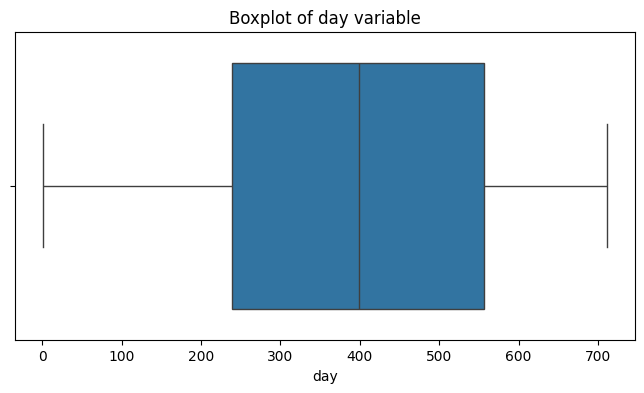

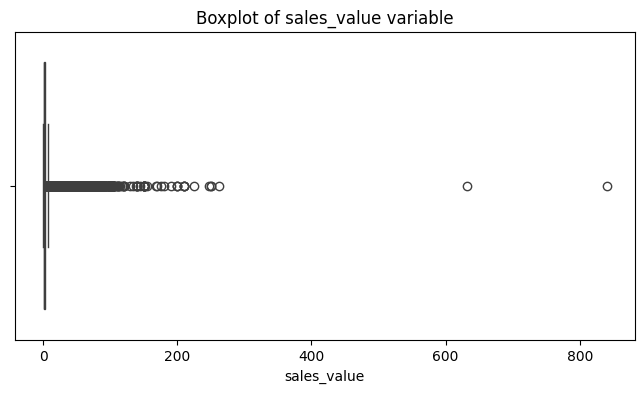

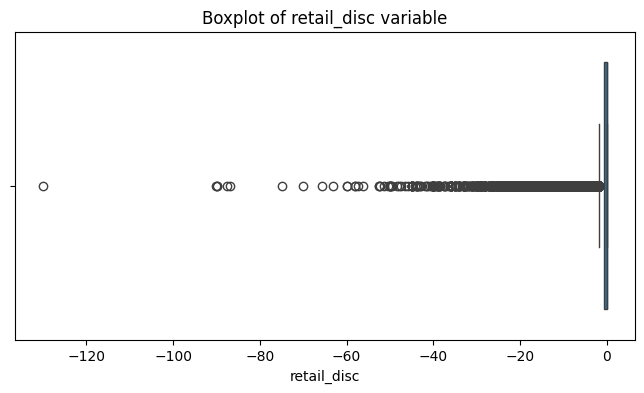

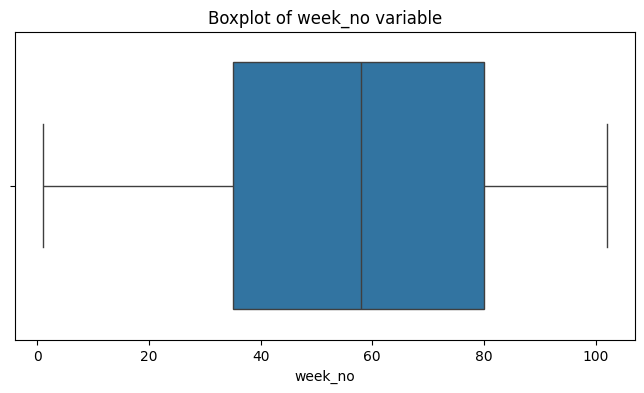

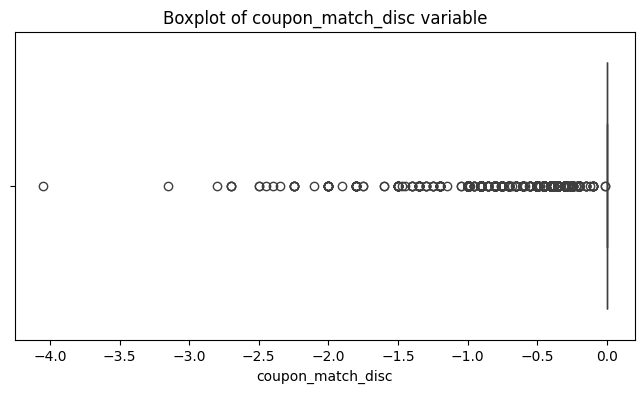

In [66]:
# Display a boxplot for each numeric column
for col in numeric_cols_to_check_outliers:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=final_merged_df[col])
    plt.title(f'Boxplot of {col} variable')
    plt.show()

In [67]:
# Detect outliers using IQR
outliers = {}
for col in numeric_cols_to_check_outliers:
    Q1 = final_merged_df[col].quantile(0.25)
    Q3 = final_merged_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = final_merged_df[(final_merged_df[col] < lower_bound) | (final_merged_df[col] > upper_bound)][col]

# Print number of outliers for each numeric columns
for col, vals in outliers.items():
    print(f"{col}: {len(vals)} outliers")

day: 0 outliers
sales_value: 105752 outliers
retail_disc: 112150 outliers
week_no: 0 outliers
coupon_match_disc: 12245 outliers


There are no outliers for 'day' and 'week_no' variables. <br>
Although outliers are presenet in the'sales_values', 'retail_disc' and 'coupon_match_disc' variables, no abnormal values are observed, for example:
- No positive values for 'retail_disc' and 'coupon_match_disc'.
- No negative values for 'sales_value'. <br>

We will keep these outliers because the values are valid in the transactions. Abnormally high 'sales_value' may indicate high spending customers, while abnormally high negative discount values may indicate customers who are sensitive to discounts.

Additionally, there are many outliers, and removing them would further reduce the total numbenr of rows in the dataset.

We will re-evaluate these outliers after grouping the transactions by households.

# Group Transactions by Households

## Recency, Frequency and Monetaty (RFM) Variables

In [68]:
# Display the data type of each column in the 'final_merged_df' after creating variables and removing non-important variables
print(final_merged_df.dtypes)

household_key               int64
basket_id                   int64
day                         int64
sales_value               float64
retail_disc               float64
used_retailed_discount     object
week_no                     int64
used_coupon                object
coupon_match_disc         float64
campaign_type              object
received_campaign          object
age_desc                   object
income_desc                object
household_size_desc        object
kid_category_desc          object
product_category           object
brand                      object
display                    object
mailer                     object
trans_time_sin            float64
trans_time_cos            float64
trans_time_day             object
dtype: object


In [69]:
# Display first 5 rows of the dataset
final_merged_df.head(5)

,household_key,basket_id,day,sales_value,retail_disc,used_retailed_discount,week_no,used_coupon,coupon_match_disc,campaign_type,received_campaign,age_desc,income_desc,household_size_desc,kid_category_desc,product_category,brand,display,mailer,trans_time_sin,trans_time_cos,trans_time_day
0,979,40765361731,606,0.00,0.0,no,87,yes,0.0,received 16 coupons,yes,35-44,35-49K,2,1,miscellaneous & services,National,Missing Display Info,Missing Advertisment Info,-0.908143,-0.418660,Afternoon
3,1228,31883657167,328,24.38,-1.6,yes,48,yes,0.0,received 16 coupons,yes,45-54,100-124K,1,0,seafood,Private,Not Displayed,On Advertisement,-0.636078,-0.771625,Afternoon
4,17,28179613679,100,103.32,0.0,no,15,yes,0.0,received 16 coupons,yes,65+,Under 15K,2,0,health_personal_care,National,Missing Display Info,Missing Advertisment Info,-0.996566,-0.082808,Evening
8,888,28601552856,128,14.39,-1.6,yes,19,yes,0.0,received 16 coupons,yes,25-34,150-174K,3,1,deli & bakery,Private,Missing Display Info,Missing Advertisment Info,-0.996917,0.078459,Evening
9,400,32173185680,353,0.00,0.0,no,51,yes,0.0,received 16 coupons,yes,35-44,150-174K,3,1,miscellaneous & services,National,Missing Display Info,Missing Advertisment Info,-0.473320,-0.880891,Afternoon


In [70]:
# Check the minimum and maximum values of 'day' variable
min_day = final_merged_df['day'].min()
max_day = final_merged_df['day'].max()

print("Minimum value of 'day' variable:", min_day)
print("Maximum value of of 'day' variable:", max_day)

Minimum value of 'day' variable: 1
Maximum value of of 'day' variable: 711


In [71]:
# Calculate last transaction day for each household
last_purchase = final_merged_df.groupby('household_key')['day'].max().reset_index()
last_purchase = last_purchase.rename(columns={'day': 'last_day'})

# Calculate recency (days since the customer's most recent transaction)
last_purchase['recency'] = max_day - last_purchase['last_day']

# Create recency dataframe
recency_df = last_purchase[['household_key', 'recency']]
recency_df.head()

,household_key,recency
0,1,5
1,7,2
2,8,5
3,13,2
4,16,21


In [72]:
# Calculate frequency (Number of unique transactions per household)
frequency_df = final_merged_df.groupby('household_key')['basket_id'].nunique().reset_index()
frequency_df = frequency_df.rename(columns={'basket_id': 'frequency'})

# Display first 5 rows of the dataset
frequency_df.head()

,household_key,frequency
0,1,86
1,7,59
2,8,113
3,13,275
4,16,98


In [73]:
# Calculate monetary (Number of unique transactions per household)
monetary_df = final_merged_df.groupby('household_key')['sales_value'].sum().reset_index()
monetary_df = monetary_df.rename(columns={'sales_value': 'monetary'})

# Display first 5 rows of the dataset
monetary_df.head()

,household_key,monetary
0,1,4330.16
1,7,3400.05
2,8,5534.97
3,13,13190.92
4,16,1512.02


In [74]:
# Combine Recency, Frequency, and Monetary dataframes into a single RFM dataframe
rfm_df = (
    recency_df[['household_key', 'recency']]
        .merge(frequency_df, on='household_key')
        .merge(monetary_df, on='household_key')
)

# Display first 5 rows of the dataset
rfm_df.head()

,household_key,recency,frequency,monetary
0,1,5,86,4330.16
1,7,2,59,3400.05
2,8,5,113,5534.97
3,13,2,275,13190.92
4,16,21,98,1512.02


## Demographic Variable

In [75]:
final_merged_df.describe()

,household_key,basket_id,day,sales_value,retail_disc,week_no,coupon_match_disc,trans_time_sin,trans_time_cos
count,1.427303e+06,1.427303e+06,1.427303e+06,1.427303e+06,1.427303e+06,1.427303e+06,1.427303e+06,1.427303e+06,1.427303e+06
mean,1.270911e+03,3.415043e+10,3.949073e+02,3.151199e+00,-5.347867e-01,5.709954e+01,-3.717872e-03,-5.267334e-01,-3.144233e-01
std,7.413937e+02,4.680249e+09,1.868281e+02,4.251720e+00,1.225006e+00,2.668867e+01,4.372860e-02,5.052652e-01,6.069575e-01
min,1.000000e+00,2.698490e+10,1.000000e+00,0.000000e+00,-1.300200e+02,1.000000e+00,-4.050000e+00,-1.000000e+00,-1.000000e+00
25%,6.310000e+02,3.058042e+10,2.390000e+02,1.290000e+00,-6.900000e-01,3.500000e+01,0.000000e+00,-9.440890e-01,-8.890171e-01
50%,1.260000e+03,3.289548e+10,3.990000e+02,2.090000e+00,0.000000e+00,5.800000e+01,0.000000e+00,-7.283710e-01,-4.539905e-01
75%,1.939000e+03,4.012860e+10,5.560000e+02,3.490000e+00,0.000000e+00,8.000000e+01,0.000000e+00,-2.249511e-01,1.650476e-01
max,2.499000e+03,4.230271e+10,7.110000e+02,8.400000e+02,0.000000e+00,1.020000e+02,0.000000e+00,1.000000e+00,1.000000e+00


In [76]:
# Number of unique households
num_unique_households = final_merged_df['household_key'].nunique()
print(num_unique_households)

801
